In [ ]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
from fastai.vision import *
from fastai.metrics import error_rate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np 
import zipfile
import matplotlib.pyplot as plt
import time
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import random
import shutil
from fastai.vision.all import *

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision.all import *
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
import torch
from sklearn.model_selection import train_test_split
from fastai import *
from fastai.vision import *
#from fastai.layers import MSELossFlat, CrossEntropyFlat
from torchvision import transforms
import warnings
warnings.filterwarnings("ignore")

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = 'drive/MyDrive/UTKFace/'

Mounted at /content/drive


In [ ]:
def display(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def display_print_data(row):
    print(f"Gender:{row[2]}\nAge:{row[1]}")
    plt.imshow(cv2.cvtColor(row[0], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
images = []
ages = []
genders = []
filenames = []
ethnicity = []
labels = []

for file_name in os.listdir(path):
    split = file_name.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(cv2.imread(path+file_name))
    filenames.append(file_name)
    labels.append(" ".join(file_name.split('_')[:3]))
    if len(split) == 4:
        ethnicity.append(int(split[2]))
    else:
        ethnicity.append(4)
    
        
images = pd.Series(list(images), name = 'image')
ages = pd.Series(list(ages), name = 'age')
genders = pd.Series(list(genders), name = 'gender')
ethnicity = pd.Series(list(ethnicity), name = 'ethnicity')
filenames = pd.Series(list(filenames), name = 'filename')
labels = pd.Series(list(labels), name = 'label')
df = pd.concat([images, ages, genders,ethnicity, filenames,labels], axis=1)
df

,image,age,gender,ethnicity,filename,label
0,"[[[180, 184, 185], [176, 180, 181], [171, 175, 176], [170, 174, 175], [170, 174, 175], [167, 171, 172], [162, 166, 167], [157, 161, 162], [163, 167, 168], [181, 185, 186], [190, 194, 195], [185, 189, 190], [181, 185, 186], [186, 190, 191], [185, 189, 190], [176, 181, 182], [172, 177, 180], [168, 175, 178], [166, 173, 176], [165, 172, 175], [166, 172, 177], [166, 172, 177], [163, 171, 178], [161, 169, 176], [161, 168, 177], [156, 163, 172], [148, 156, 169], [146, 154, 167], [148, 157, 170], [150, 159, 172], [151, 160, 174], [150, 160, 170], [162, 173, 177], [177, 189, 189], [193, 203, 203],...",85,1,0,85_1_0_20170120230116817.jpg.chip.jpg,85 1 0
1,"[[[124, 132, 161], [117, 125, 154], [110, 121, 149], [109, 120, 148], [104, 115, 145], [95, 106, 136], [85, 98, 130], [83, 96, 128], [92, 106, 142], [108, 122, 158], [112, 128, 165], [104, 120, 157], [98, 115, 154], [109, 126, 165], [123, 140, 179], [127, 145, 186], [120, 142, 184], [108, 131, 176], [104, 127, 172], [107, 130, 175], [103, 126, 172], [91, 114, 160], [85, 107, 155], [89, 111, 159], [87, 108, 160], [87, 108, 160], [88, 108, 163], [90, 110, 165], [92, 111, 168], [92, 111, 168], [91, 110, 167], [89, 109, 164], [92, 113, 165], [92, 113, 164], [95, 116, 167], [102, 123, 174], [10...",9,0,0,9_0_0_20170110224737016.jpg.chip.jpg,9 0 0
2,"[[[14, 32, 33], [15, 33, 34], [19, 31, 35], [20, 31, 35], [25, 31, 38], [31, 33, 41], [41, 34, 47], [48, 38, 51], [59, 40, 57], [66, 42, 60], [75, 43, 67], [83, 47, 71], [89, 50, 76], [97, 54, 81], [105, 59, 88], [109, 64, 90], [111, 69, 86], [109, 70, 85], [107, 70, 86], [105, 68, 88], [102, 64, 86], [94, 59, 85], [90, 53, 85], [84, 51, 86], [89, 54, 94], [86, 51, 95], [83, 47, 93], [81, 45, 92], [77, 41, 93], [78, 42, 94], [79, 43, 97], [73, 46, 96], [57, 45, 93], [51, 49, 95], [51, 53, 101], [48, 55, 105], [44, 56, 110], [41, 60, 117], [42, 63, 124], [40, 67, 131], [42, 71, 140], [39, 7...",8,1,1,8_1_1_20170109203648153.jpg.chip.jpg,8 1 1
3,"[[[21, 26, 25], [20, 25, 24], [20, 25, 24], [20, 25, 24], [21, 26, 25], [23, 28, 27], [25, 30, 29], [27, 32, 31], [28, 33, 32], [28, 33, 32], [29, 34, 33], [30, 35, 34], [31, 36, 35], [31, 36, 35], [32, 37, 36], [32, 37, 36], [32, 37, 36], [35, 40, 39], [38, 43, 42], [40, 45, 44], [40, 45, 44], [41, 46, 45], [43, 48, 47], [44, 49, 48], [49, 54, 53], [54, 59, 58], [60, 65, 64], [66, 71, 70], [71, 76, 75], [75, 80, 79], [79, 84, 83], [82, 87, 86], [92, 97, 96], [94, 99, 98], [96, 101, 100], [99, 104, 103], [102, 107, 106], [103, 108, 107], [105, 109, 110], [105, 109, 110], [109, 113, 114], [...",99,1,1,99_1_1_20170120134639935.jpg.chip.jpg,99 1 1
4,"[[[160, 180, 181], [160, 180, 181], [159, 179, 184], [158, 178, 183], [154, 175, 183], [152, 172, 183], [148, 170, 182], [147, 167, 184], [144, 166, 184], [137, 158, 180], [125, 147, 172], [118, 139, 166], [114, 135, 166], [114, 135, 166], [113, 136, 168], [112, 137, 171], [110, 135, 175], [106, 131, 173], [101, 129, 170], [97, 127, 168], [97, 127, 168], [96, 128, 169], [93, 127, 170], [92, 126, 169], [91, 125, 168], [90, 124, 167], [91, 122, 167], [90, 121, 166], [93, 119, 165], [93, 119, 165], [95, 118, 166], [95, 119, 165], [99, 123, 165], [99, 124, 164], [99, 124, 164], [98, 123, 163],...",80,0,0,80_0_0_20170117175248197.jpg.chip.jpg,80 0 0
...,...,...,...,...,...,...
23731,"[[[57, 63, 68], [57, 63, 68], [57, 64, 67], [58, 66, 66], [58, 68, 68], [60, 71, 69], [60, 74, 70], [61, 75, 71], [63, 78, 74], [61, 78, 74], [62, 79, 76], [61, 80, 77], [61, 79, 80], [62, 80, 81], [61, 80, 83], [61, 80, 85], [62, 80, 87], [67, 84, 93], [72, 90, 101], [76, 94, 105], [76, 95, 108], [80, 99, 112], [84, 105, 120], [89, 110, 125], [93, 116, 132], [94, 117, 133], [93, 117, 135], [95, 119, 137], [96, 121, 141], [98, 123, 143], [97, 124, 145], [98, 125, 146], [97, 125, 149], [96, 124, 148], [96, 124, 148], [96, 124, 148], [97, 125, 149], [99, 127, 151], [101, 129, 153], [103, 131...",16,0,0,16_0_0_20170110231909175.jpg.chip.jpg,16

In [ ]:
df.shape

(23736, 6)

In [ ]:
bad_images = ['1_0_0_20170109194120301.jpg.chip.jpg','1_0_0_20170109193052283.jpg.chip.jpg','1_1_0_20170109190852630.jpg.chip.jpg','1_1_0_20170109194452834.jpg.chip.jpg','1_1_4_20170109194502921.jpg.chip.jpg','72_0_0_20170111222516126.jpg.chip.jpg','80_0_2_20170111210646563.jpg.chip.jpg','90_0_0_20170111210338948.jpg.chip.jpg','76_0_1_20170116205556715.jpg.chip.jpg']
wrong_imagies = ['1_0_2_20161219161843718.jpg.chip.jpg','1_0_3_20170104230640081.jpg.chip.jpg','1_0_4_20161221193016140.jpg.chip.jpg','1_0_4_20161221193041157.jpg.chip.jpg','2_0_0_20170104201100490.jpg.chip.jpg','2_1_1_20170116231935539.jpg.chip.jpg']

Bad images


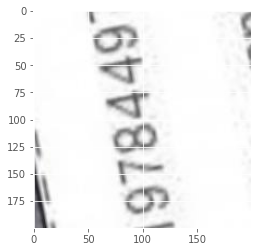

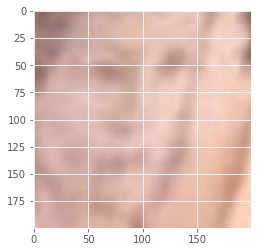

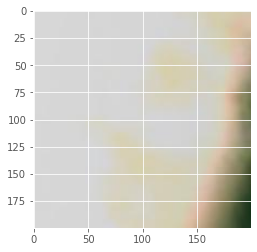

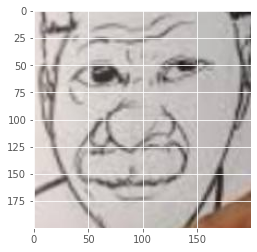

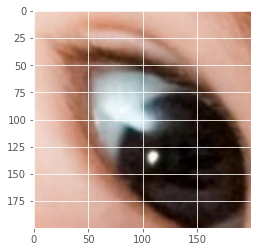

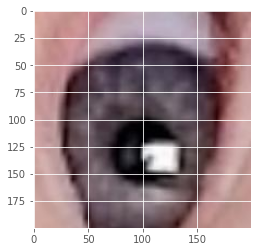

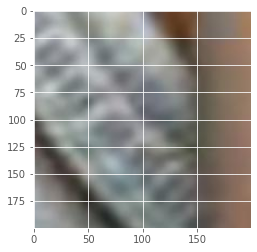

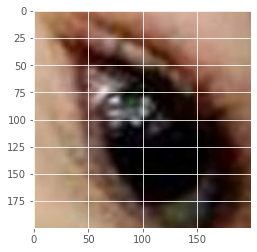

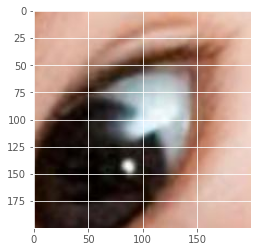

In [ ]:
print("Bad images")

_bad = df.loc[df['filename'].isin(bad_images), :]
[display(img)for img in _bad.image];

In [ ]:
df = df.drop(index=[row[0] for row in _bad.iterrows()])

Wrong images:

Gender:0
Age:2


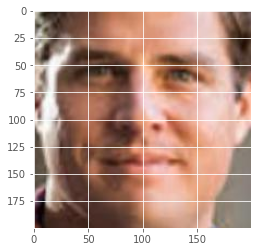

Gender:1
Age:2


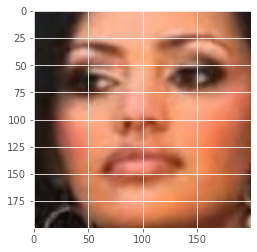

Gender:0
Age:1


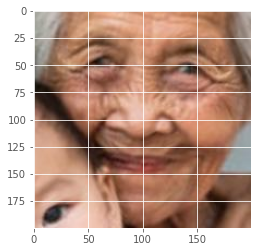

Gender:0
Age:1


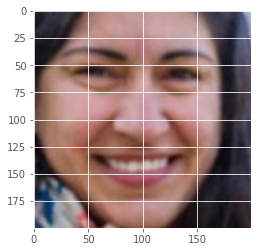

Gender:0
Age:1


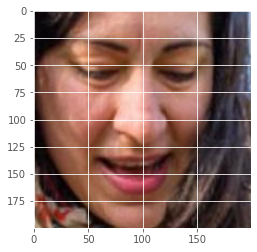

Gender:0
Age:1


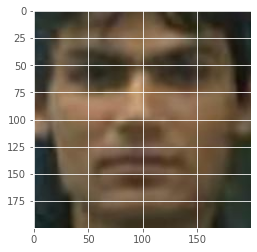

In [ ]:
print("Wrong images:\n")
_wrong = df.loc[df['filename'].isin(wrong_imagies), :]

[display_print_data(row[1]) for row in _wrong.iterrows()];


In [ ]:
df = df.drop(index=[row[0] for row in _wrong.iterrows()])

In [ ]:
df.describe()

,age,gender,ethnicity
count,23721.000000,23721.000000,23721.000000
mean,33.305004,0.477003,1.269044
std,19.867194,0.499735,1.345390
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000
max,116.000000,3.000000,4.000000


In [ ]:
df.gender.value_counts()

0    12408
1    11312
3        1
Name: gender, dtype: int64

In [ ]:
df[df.gender == 3]

,image,age,gender,ethnicity,filename,label
999,"[[[47, 45, 45], [49, 47, 47], [51, 49, 49], [52, 50, 50], [53, 51, 51], [53, 51, 51], [52, 50, 50], [51, 49, 49], [49, 47, 47], [52, 50, 50], [55, 53, 53], [57, 55, 55], [58, 56, 56], [56, 54, 54], [54, 52, 52], [50, 50, 50], [51, 51, 51], [50, 52, 52], [52, 52, 52], [52, 52, 52], [57, 52, 53], [60, 55, 56], [65, 59, 60], [69, 63, 64], [71, 65, 66], [69, 63, 64], [66, 61, 62], [64, 62, 62], [65, 63, 63], [65, 65, 65], [64, 66, 66], [61, 65, 66], [58, 60, 68], [57, 59, 69], [59, 61, 69], [61, 63, 71], [63, 66, 74], [66, 72, 79], [70, 74, 85], [69, 77, 90], [69, 79, 97], [72, 84, 108], [78, ...",61,3,4,61_3_20170109150557335.jpg.chip.jpg,61 3 20170109150557335.jpg.chip.jpg


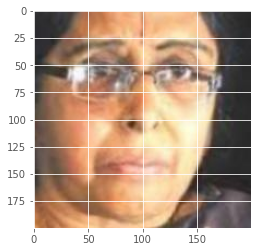

In [ ]:
idx = df[df.gender == 3].index.to_numpy()[0]
display(df[df.index == idx].values[0][0])

In [ ]:
df.loc[idx,"gender"] = 1
df.loc[idx,"label"] = '61 1 3'

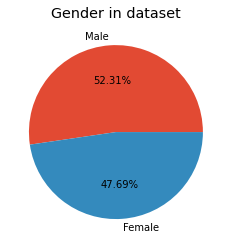

In [ ]:
y = np.array([35, 25, 25, 15])
labels = ["Male","Female"]
gender_count = [sum(df.gender==0), sum(df.gender==1)]
plt.pie(gender_count, labels=labels,autopct = lambda p:f'{p:.2f}%')
plt.title("Gender in dataset");

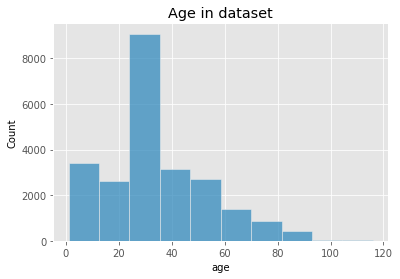

In [ ]:
sns.histplot(df.age, bins=10)
plt.title("Age in dataset");

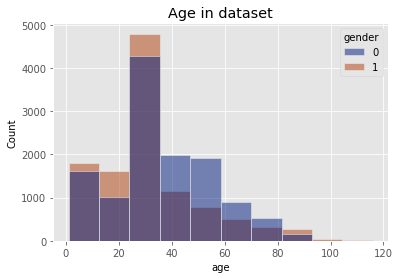

In [ ]:
sns.set_palette(sns.color_palette("dark"), n_colors=None, desat=None, color_codes=False)
sns.histplot(data=df,x="age", hue="gender", multiple="layer", bins=10)
plt.title("Age in dataset");

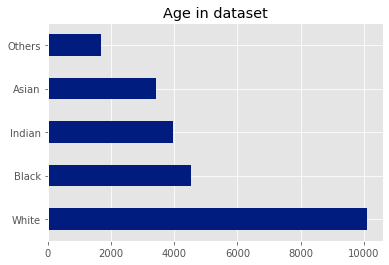

In [ ]:
_d = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}
df.ethnicity.replace(_d).value_counts().plot.barh()
plt.title("Age in dataset");

In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(df, test_size=0.2,shuffle  = True)
print("Samples in Training:",train.shape[0])
print("Samples in Validation:",valid.shape[0])

Samples in Training: 18976
Samples in Validation: 4745


In [ ]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
from fastai.data.core import DataLoaders

In [ ]:
class MultiTaskDataset(Dataset):
    def __init__(self,df, size=64):
        self.labels = list(df.label)
        self.images = list(df.image)
        self.size = size
        self.norm = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #imagenet stats

    def __len__(self): return len(self.labels)

    def __getitem__(self,idx, show=False, tr=None):
        if not tr:
          tr =[1,0,2]
        #dealing with the image
        img = self.images[idx]

        #dealing with the labels
        labels = self.labels[idx].split(" ")
        age = torch.tensor(float(labels[0]), dtype=torch.float32)
        gender = torch.tensor(int(labels[1]), dtype=torch.int64)
        #print(labels[2])
        ethnicity = torch.tensor(int(labels[2]), dtype=torch.int64)
        if show:
          return img, (age.log_()/4.75, gender, ethnicity)
        return torchvision.transforms.functional.to_tensor(img.transpose(*tr)), (age.log_()/4.75, gender, ethnicity)

    def show(self,idx):
        x,y = self.__getitem__(idx, show=True)
        age,gender,ethnicity = y
        plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
        plt.title(f"Age:{int(age.mul_(4.75).exp_().item())} Gender:{gender.item()} Ethnicity:{ethnicity.item()}")

In [ ]:
train_ds = MultiTaskDataset(train, size=64)
valid_ds = MultiTaskDataset(valid, size=64)
data = ImageDataLoaders.from_dsets(train_ds, valid_ds, batch_size=512, shuffle=True, num_workers=0)

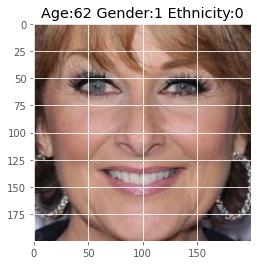

In [ ]:
train_ds.show(0)

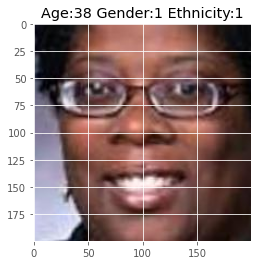

In [ ]:
valid_ds.show(0)

In [ ]:
from torch import nn
class MultiTaskModel(nn.Module):
    def __init__(self, arch,ps=0.5):
        super(MultiTaskModel,self).__init__()
        self.encoder = create_body(arch)
        self.fc1 = create_head(1024,1,ps=ps)
        self.fc2 = create_head(1024,2,ps=ps)

    def forward(self,x):

        x = self.encoder(x)
        age = torch.sigmoid(self.fc1(x))
        gender = self.fc2(x)

        return [age, gender]

In [ ]:
from fastai.losses import  MSELossFlat, CrossEntropyLossFlat

In [ ]:
class MultiTaskLossWrapper(nn.Module):
    def __init__(self, task_num):
        super(MultiTaskLossWrapper, self).__init__()
        self.task_num = task_num
        self.log_vars = nn.Parameter(torch.zeros((task_num)))

    def forward(self, preds, age, gender, ethnicity):

        mse, crossEntropy = MSELossFlat(), CrossEntropyLossFlat()
        
        sages = (age*4.75).exp_()
        idx1 = (sages <20) | ((sages > 40) & (sages <= 60))
        idx2 = sages > 60
        loss0 = mse(preds[0], age) + 2*mse(preds[0][idx1],age[idx1]) + 3*mse(preds[0][idx2],age[idx2]) #trying to account for the imbalance
        loss1 = crossEntropy(preds[1],gender)

        precision0 = torch.exp(-self.log_vars[0])
        loss0 = precision0*loss0 + self.log_vars[0]

        precision1 = torch.exp(-self.log_vars[1])
        loss1 = precision1*loss1 + self.log_vars[1]
        
        return loss0+loss1

In [ ]:
from tensorflow.compat.v1 import metrics as tf_metrics

In [ ]:
def rmse_age(preds, age, gender): return tf_metrics.root_mean_squared_error(preds[0],age)
def acc_gender(preds, age, gender): return tf_metrics.accuracy(preds[1], gender)
#def acc_ethnicity(preds, age, gender, ethnicity): return accuracy(preds[2], ethnicity)
metrics = [rmse_age, acc_gender]

In [ ]:
model = MultiTaskModel(models.resnet34(pretrained=True), ps=0.25)

loss_func = MultiTaskLossWrapper(3)


learn = Learner(data, model, loss_func=loss_func, metrics=metrics)

#spliting the model so that I can use discriminative learning rates
#learn._split([learn.model.encoder[:6],
#             learn.model.encoder[6:],
#             nn.ModuleList([learn.model.fc1, learn.model.fc2])]);

#first I'll train only the last layer group (the heads)
learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

RuntimeError: ignored

In [ ]:
learn.fit_one_cycle(15,lr_max=1e-2,cbs=[EarlyStoppingCallback()])